In [32]:
%cd "D:\\PycharmProjects\\lipschitz bandit"
import numpy as np
import matplotlib.pyplot as plt
import random
from doo_discrete import DiscreteDOO
from zooming_opt import zooming


D:\PycharmProjects\lipschitz bandit


In [28]:
n=1000
f_real = [np.sin(x/3)-0.5*abs(x/500-1) for x in range(1,n)]
#f_real = [np.sin(x)-0.5*abs(x/30-1) for x in range(1,n)]
#f_real = [np.sin(x)-0.5*abs(x/100-1) for x in range(1,n)]
#f_real = np.random.rand(n)

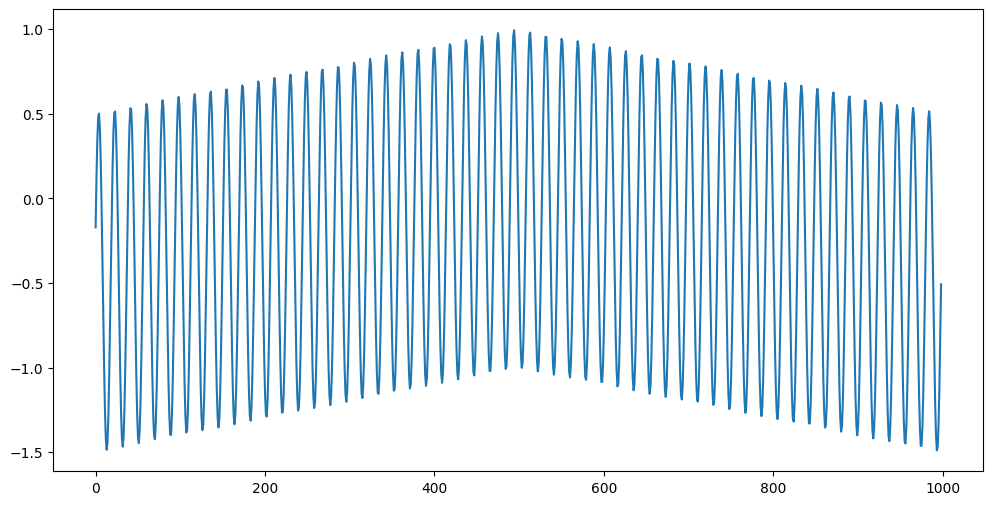

In [17]:
plt.figure(figsize=(12,6))
plt.plot(f_real,'-')

In [4]:
# Adaptive L, maximize ub
A=list(range(0,n-1))
I=list(range(int(n/3),n-1,int(n/3)))
R=[i for i in A if i not in I]
count=1
while R:
    ub=[]
    print("period",count,"\nlen(I)=",len(I)) 
    count+=1
    mu_max = max([f_real[i] for i in I])
    a_max = I[np.argmax([f_real[i] for i in I])]
    L = [[np.abs((f_real[j]-f_real[i])/(j - i)) for i in I if not i==j] for j in I]
    L = np.max(np.max(L))
    print("L=", L)
    for a in R:
        ub.append(min(f_real[i]+L*abs(a-i) for i in I))
        
    if max(ub)<=mu_max:
        break
    
  #  k=int(len(R)/3+1)
    k=1
    for i in range(k):
        a=R[np.argmax(ub)]
        if max(ub) > mu_max:
            I.append(a)           
            R.remove(a)
            ub.remove(max(ub))
        else:
            break
    print("mu_max=",mu_max,"a_max=",a_max, '\n')

period 1 
len(I)= 2
L= 0.01811980731567622
mu_max= -0.5055459855981694 a_max= 66 

period 2 
len(I)= 3
L= 0.031733057678294894


In [5]:
# fixed L, random choice
L=0.35
A=list(range(0,n-1))
I=list(range(int(n/3),n-1,int(n/3)))
R=[i for i in A if i not in I]
count=1
while True:
    ub=np.zeros(n)-10
    lb=np.zeros(n)-10
    print("period",count,"\nlen(I)=",len(I)) 
    count+=1
    mu_max = max([f_real[i] for i in I])
    a_max = I[np.argmax([f_real[i] for i in I])]
    for a in R:
        ub[a]=min(f_real[i]+L*abs(a-i) for i in I)
        lb[a]=max(f_real[i]-L*abs(a-i) for i in I)
    if max(ub)<=mu_max:
        break
    
    R = []
    
    for i in range(n):
        if ub[i]<=mu_max:
            ub[i]=-10
            lb[i]=-10
        else: 
            R.append(i)

    
    a=random.choice(R)
    I.append(a)           
    R.remove(a)
    print("mu_max=",mu_max,"a_max=",a_max, '\n')

period 1 
len(I)= 2
mu_max= -0.5055459855981694 a_max= 66 

period 2 
len(I)= 3
mu_max= 0.8030598679680194 a_max= 43 

period 3 
len(I)= 4
mu_max= 0.8030598679680194 a_max= 43 

period 4 
len(I)= 5
mu_max= 0.8030598679680194 a_max= 43 

period 5 
len(I)= 6
mu_max= 0.8030598679680194 a_max= 43 

period 6 
len(I)= 7
mu_max= 0.8030598679680194 a_max= 43 

period 7 
len(I)= 8
mu_max= 0.8030598679680194 a_max= 43 

period 8 
len(I)= 9
mu_max= 0.8030598679680194 a_max= 43 

period 9 
len(I)= 10
mu_max= 0.8030598679680194 a_max= 43 

period 10 
len(I)= 11
mu_max= 0.8030598679680194 a_max= 43 

period 11 
len(I)= 12
mu_max= 0.8030598679680194 a_max= 43 

period 12 
len(I)= 13
mu_max= 0.8030598679680194 a_max= 43 

period 13 
len(I)= 14
mu_max= 0.8030598679680194 a_max= 43 

period 14 
len(I)= 15
mu_max= 0.8129452507276277 a_max= 59 

period 15 
len(I)= 16
mu_max= 0.8129452507276277 a_max= 59 

period 16 
len(I)= 17
mu_max= 0.8129452507276277 a_max= 59 

period 17 
len(I)= 18
mu_max= 0.91082099

In [6]:
# fixed L, maximize ub
L=0.35
A=list(range(0,n-1))
I=list(range(int(n/3),n-1,int(n/3)))
R=[i for i in A if i not in I]
count=1
while True:
    ub=np.zeros(n)-10
    lb=np.zeros(n)-10
    print("period",count,"\nlen(I)=",len(I)) 
    count+=1
    mu_max = max([f_real[i] for i in I])
    a_max = I[np.argmax([f_real[i] for i in I])]
    for a in R:
        ub[a]=min(f_real[i]+L*abs(a-i) for i in I)
        lb[a]=max(f_real[i]-L*abs(a-i) for i in I)
    if max(ub)<=mu_max:
        break
    
    R = []
    
    for i in range(n):
        if ub[i]<=mu_max:
            ub[i]=-10
            lb[i]=-10
        else: 
            R.append(i)

    ex=[(ub[i]+lb[i])/2 for i in range(n) ]
    
    a=np.argmax(ub)
    I.append(a)           
    R.remove(a)
    print("mu_max=",mu_max,"a_max=",a_max, '\n')

period 1 
len(I)= 2
mu_max= -0.5055459855981694 a_max= 66 

period 2 
len(I)= 3
mu_max= 0.5099118601072672 a_max= 98 

period 3 
len(I)= 4
mu_max= 0.5099118601072672 a_max= 98 

period 4 
len(I)= 5
mu_max= 0.5099118601072672 a_max= 98 

period 5 
len(I)= 6
mu_max= 0.5099118601072672 a_max= 98 

period 6 
len(I)= 7
mu_max= 0.5099118601072672 a_max= 98 

period 7 
len(I)= 8
mu_max= 0.5099118601072672 a_max= 98 

period 8 
len(I)= 9
mu_max= 0.5099118601072672 a_max= 98 

period 9 
len(I)= 10
mu_max= 0.6372941080946944 a_max= 24 

period 10 
len(I)= 11
mu_max= 0.8129452507276277 a_max= 59 

period 11 
len(I)= 12
mu_max= 0.8129452507276277 a_max= 59 

period 12 
len(I)= 13
mu_max= 0.910820994486603 a_max= 42 

period 13 
len(I)= 14
mu_max= 0.910820994486603 a_max= 42 

period 14 
len(I)= 15
mu_max= 0.910820994486603 a_max= 42 

period 15 
len(I)= 16
mu_max= 0.910820994486603 a_max= 42 

period 16 
len(I)= 17
mu_max= 0.910820994486603 a_max= 42 

period 17 
len(I)= 18
mu_max= 0.9108209944866

mu*=51: 32 55
mu*=32: 33 44
mu*=95: 30 53

In [7]:
# fixed L, DP: expectation of max f
L=1.02
A=list(range(0,n-1))
I=list(range(int(n/3),n-1,int(n/3)))
R=[i for i in A if i not in I]
count=1
while True:
    ub=np.zeros(n)-10
    lb=np.zeros(n)-10
    print("period",count,"\nlen(I)=",len(I)) 
    count+=1
    mu_max = max([f_real[i] for i in I])
    a_max = I[np.argmax([f_real[i] for i in I])]
    for a in R:
        ub[a]=min(f_real[i]+L*abs(a-i) for i in I)
        lb[a]=max(f_real[i]-L*abs(a-i) for i in I)
    if max(ub)<=mu_max:
        break
    
    R = []
    
    for i in range(n):
        if ub[i]<=mu_max:
            ub[i]=-10
            lb[i]=-10
        else: 
            R.append(i)

    ex=[(ub[i]+lb[i])/2 for i in range(n) ]
    
    a=np.argmax(ex)
    I.append(a)           
    R.remove(a)
    print("mu_max=",mu_max,"a_max=",a_max, '\n')

period 1 
len(I)= 2
mu_max= -0.5055459855981694 a_max= 66 

period 2 
len(I)= 3
mu_max= -0.06909421169213092 a_max= 83 

period 3 
len(I)= 4
mu_max= -0.060750402120641284 a_max= 75 

period 4 
len(I)= 5
mu_max= -0.060750402120641284 a_max= 75 

period 5 
len(I)= 6
mu_max= -0.060750402120641284 a_max= 75 

period 6 
len(I)= 7
mu_max= 0.23891633323081274 a_max= 76 

period 7 
len(I)= 8
mu_max= 0.6422534762725948 a_max= 78 

period 8 
len(I)= 9
mu_max= 0.6993203457800979 a_max= 79 

period 9 
len(I)= 10
mu_max= 0.6993203457800979 a_max= 79 

period 10 
len(I)= 11
mu_max= 0.6993203457800979 a_max= 79 

period 11 
len(I)= 12
mu_max= 0.6993203457800979 a_max= 79 

period 12 
len(I)= 13
mu_max= 0.6993203457800979 a_max= 79 

period 13 
len(I)= 14
mu_max= 0.6993203457800979 a_max= 79 

period 14 
len(I)= 15
mu_max= 0.6993203457800979 a_max= 79 

period 15 
len(I)= 16
mu_max= 0.6993203457800979 a_max= 79 

period 16 
len(I)= 17
mu_max= 0.6993203457800979 a_max= 79 

period 17 
len(I)= 18
mu_max

mu*=51: 32 58
mu*=32: 8 44
mu*=95: 41 60

In [8]:
# fixed L, DP: expectation of max ub
L=1.02
A=list(range(0,n-1))
I=list(range(int(n/3),n-1,int(n/3)))
R=[i for i in A if i not in I]
count=1
while True:
    ub=np.zeros(n)-10
    lb=np.zeros(n)-10
    print("period",count,"\nlen(I)=",len(I)) 
    count+=1
    mu_max = max([f_real[i] for i in I])
    a_max = I[np.argmax([f_real[i] for i in I])]
    for a in R:
        ub[a]=min(f_real[i]+L*abs(a-i) for i in I)
        lb[a]=max(f_real[i]-L*abs(a-i) for i in I)
    if max(ub)<=mu_max:
        break
    
    R = []
    
    for i in range(n):
        if ub[i]<=mu_max:
            ub[i]=-10
            lb[i]=-10
        else: 
            R.append(i)

    sum=np.zeros(len(R))
    for k in range(len(R)):
        a=R[k]
        ub_temp=np.zeros(len(R))
        for i in range(100):
            x = np.random.uniform(lb[k],ub[k])
            sum[k] += max( min(ub[r],x+L*np.abs(R[r]-a)) for r in range(len(R)) )
    
        
    ex=[s/100 for s in sum]
    
    a=R[np.argmax(ex)]
    I.append(a)           
    R.remove(a)
    print("mu_max=",mu_max,"a_max=",a_max, '\n')

period 1 
len(I)= 2
mu_max= -0.5055459855981694 a_max= 66 

period 2 
len(I)= 3
mu_max= -0.5055459855981694 a_max= 66 

period 3 
len(I)= 4
mu_max= -0.3609337659011681 a_max= 36 

period 4 
len(I)= 5
mu_max= -0.019872014453427234 a_max= 37 

period 5 
len(I)= 6
mu_max= 0.910820994486603 a_max= 42 

period 6 
len(I)= 7
mu_max= 0.910820994486603 a_max= 42 

period 7 
len(I)= 8
mu_max= 0.910820994486603 a_max= 42 

period 8 
len(I)= 9
mu_max= 0.910820994486603 a_max= 42 

period 9 
len(I)= 10
mu_max= 0.910820994486603 a_max= 42 

period 10 
len(I)= 11
mu_max= 0.910820994486603 a_max= 42 

period 11 
len(I)= 12
mu_max= 0.910820994486603 a_max= 42 

period 12 
len(I)= 13
mu_max= 0.910820994486603 a_max= 42 

period 13 
len(I)= 14
mu_max= 0.910820994486603 a_max= 42 

period 14 
len(I)= 15
mu_max= 0.910820994486603 a_max= 42 

period 15 
len(I)= 16
mu_max= 0.910820994486603 a_max= 42 

period 16 
len(I)= 17
mu_max= 0.910820994486603 a_max= 42 

period 17 
len(I)= 18
mu_max= 0.910820994486603

mu*=51: 9 60
mu*=32: 36 58
mu*=95: 38 61

In [ ]:
# fixed L, DP: expectation of max lb
L=1.02
A=list(range(0,n-1))
I=list(range(int(n/3),n-1,int(n/3)))
R=[i for i in A if i not in I]
count=1
while True:
    ub=np.zeros(n)-10
    lb=np.zeros(n)-10
    print("period",count,"\nlen(I)=",len(I)) 
    count+=1
    mu_max = max([f_real[i] for i in I])
    a_max = I[np.argmax([f_real[i] for i in I])]
    for a in R:
        ub[a]=min(f_real[i]+L*abs(a-i) for i in I)
        lb[a]=max(f_real[i]-L*abs(a-i) for i in I)
    if max(ub)<=mu_max:
        break
    
    R = []
    
    for i in range(n):
        if ub[i]<=mu_max:
            ub[i]=-10
            lb[i]=-10
        else: 
            R.append(i)

    sum=np.zeros(len(R))
    for k in range(len(R)):
        a=R[k]
        ub_temp=np.zeros(len(R))
        for i in range(100):
            x = np.random.uniform(lb[k],ub[k])
            sum[k] += max( max(lb[r],x-L*np.abs(R[r]-a)) for r in range(len(R)) )
    
        
    ex=[s/100 for s in sum]
    
    a=R[np.argmax(ex)]
    I.append(a)           
    R.remove(a)
    print("mu_max=",mu_max,"a_max=",a_max, '\n')

mu*=51: 4 60
mu*=32: 50 52
mu*=95: 11 54

In [18]:
# fixed L, DP: expectation of max ub+lb
L=0.35
A=list(range(0,n-1))
I=list(range(int(n/3),n-1,int(n/3)))
R=[i for i in A if i not in I]
count=1
while True:
    ub=np.zeros(n)-10
    lb=np.zeros(n)-10
    print("period",count,"\nlen(I)=",len(I)) 
    print("I=",I)
    count+=1
    mu_max = max([f_real[i] for i in I])
    a_max = I[np.argmax([f_real[i] for i in I])]
    for a in R:
        ub[a]=min(f_real[i]+L*abs(a-i) for i in I)
        lb[a]=max(f_real[i]-L*abs(a-i) for i in I)
    if max(ub)<=mu_max:
        break
    
    R = []
    
    for i in range(n):
        if ub[i]<=mu_max:
            ub[i]=-10
            lb[i]=-10
        else: 
            R.append(i)

    sum=np.zeros(len(R))
    for k in range(len(R)):
        a=R[k]
        ub_temp=np.zeros(len(R))
        for i in range(100):
            x = np.random.uniform(lb[k],ub[k])
            sum[k] += max( max(lb[r],x-L*np.abs(R[r]-a))+min(ub[r],x+L*np.abs(R[r]-a)) for r in range(len(R)) )
    

    ex=[s/100 for s in sum]
  
    a=R[np.argmax(ex)]
    I.append(a)           
    R.remove(a)
    print("mu_max=",mu_max,"a_max=",a_max, '\n')
    


period 1 
len(I)= 2
I= [333, 666]


KeyboardInterrupt: 

 mu*=51: 5 57
mu*=32: 9 49
mu*=95: 10 57

In [ ]:
# fixed L, zooming
L=0.35
A=list(range(0,n-1))
#intv=[0,24,25,49,50,74,75,99]
I=[int((n-1)/4)+1,int(3*(n-1)/4)+1]
intv=[0,49,50,99]
count=1
while True:
    ub=np.zeros(n)-100
    lb=np.zeros(n)-100
    ub_max=[]
    print("period",count,"\nlen(I)=",len(I)) 
    count += 1
    print("I=",I)
    mu_max = max([f_real[i] for i in I])
    a_max = I[np.argmax([f_real[i] for i in I])]   
    for a in A:
        ub[a]=min(f_real[i]+L*abs(a-i) for i in I)
        lb[a]=max(f_real[i]-L*abs(a-i) for i in I)
     
    intv_new = [range(intv[2*i],intv[2*i+1]+1) for i in range(int(len(intv)/2))]
    for i in range(len(intv_new)):
        if len(intv_new[i])>=3:
            ub_max.append(max(ub[j] for j in intv_new[i]))
        else:
            ub_max.append(-10000)

    """
    for i in range(len(intv)//2):
        if intv[2*i+1]-intv[2*i]>=2:
            ub_max.append(I[i]+(intv[2*i+1]-intv[2*i])*L)
        else:
            ub_max.append(-1000)
    """
    if not ub_max:
        break;
    
    


    i_new=np.argmax(ub_max)        
    a_new_1 = (intv[2*i_new]+3*intv[2*i_new+1])//4
    a_new_2 = (3*intv[2*i_new]+intv[2*i_new+1])//4
    I.append(a_new_1)
    I.append(a_new_2)
    I.sort()
    print("mu_max=",mu_max,"a_max=",a_max, '\n')
    
    
    intv = intv + [a_new_1,a_new_2]
    intv.sort()
    
    
    #delete:
    del_intv=[]
    for i in range(len(intv)//2-1,-1,-1):   
        temp = max([ub[j] for j in range(intv[2*i],intv[2*i+1]+1)])
        if temp<=mu_max:
            del_intv.append(2*i+1)
            del_intv.append(2*i)
            
    
    for i in del_intv:
        del intv[i] 



period 1 
len(I)= 2
I= [250, 750]
mu_max= 0.6663333673769403 a_max= 250 

period 2 
len(I)= 4
I= [12, 36, 250, 750]
mu_max= 0.6663333673769403 a_max= 250 

period 3 
len(I)= 6
I= [12, 36, 62, 86, 250, 750]
mu_max= 0.6663333673769403 a_max= 250 

period 4 
len(I)= 8
I= [12, 36, 53, 59, 62, 86, 250, 750]
mu_max= 0.6663333673769403 a_max= 250 

period 5 
len(I)= 10
I= [12, 36, 53, 59, 62, 86, 89, 95, 250, 750]
mu_max= 0.6663333673769403 a_max= 250 

period 6 
len(I)= 12
I= [3, 9, 12, 36, 53, 59, 62, 86, 89, 95, 250, 750]
mu_max= 0.6663333673769403 a_max= 250 

period 7 
len(I)= 14
I= [3, 9, 12, 36, 39, 45, 53, 59, 62, 86, 89, 95, 250, 750]
mu_max= 0.6663333673769403 a_max= 250 

period 8 
len(I)= 16
I= [3, 9, 12, 36, 39, 45, 53, 59, 62, 86, 89, 95, 96, 98, 250, 750]
mu_max= 0.6663333673769403 a_max= 250 

period 9 
len(I)= 18
I= [0, 2, 3, 9, 12, 36, 39, 45, 53, 59, 62, 86, 89, 95, 96, 98, 250, 750]
mu_max= 0.6663333673769403 a_max= 250 

period 10 
len(I)= 20
I= [0, 2, 3, 9, 12, 36, 39, 4

KeyboardInterrupt: 

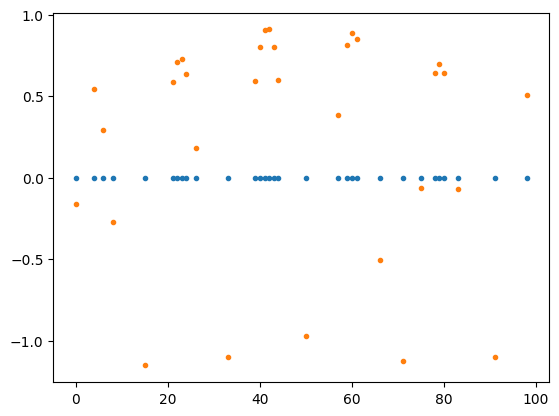

In [6]:
plt.plot(I,[0]*len(I),'.')
plt.plot(I,[f_real[i] for i in I],'.')

In [7]:
plt.show()

In [18]:
optimizer = DiscreteDOO(f=lambda x: np.sin(x/3)-0.5*abs(x/500-1), k=0.34, low=0,high=999,max_evals=100)
result = optimizer.optimize()

In [19]:
print(result)
print(len(optimizer.evaluated))
print(optimizer.evaluated)

(514, 0.9792176275626936)
101
{499: 0.16924402798118987, 249: 0.7173644611001854, 749: -1.2449572891383425, 124: -0.8489437682743344, 374: -0.9658677220842008, 624: 0.4850679301910603, 874: 0.36715115116770436, 561: -1.058171023392149, 686: 0.4346700920745523, 811: -0.15527128611973512, 936: -1.2677914757822046, 311: -0.1831091322751586, 436: 0.6671944485494448, 62: 0.5318176665334984, 186: -1.0531806966492228, 405: -0.006631313895998539, 467: -1.0205706298875339, 655: -1.1549729440834475, 717: 0.019690681275076727, 31: -1.2576162822232242, 93: -0.811037645323065, 780: 0.4032397038158507, 842: -1.2167504059305416, 280: -1.0122248087111179, 342: 0.6269803886813106, 155: 0.6406503156274583, 217: -0.3596271131772165, 530: 0.6424234000829804, 592: 0.4618689005459905, 905: -0.3312949745259641, 967: 0.48220825474813656, 326: 0.7865786524821501, 358: -0.18916999327056647, 951: -0.15466021150267756, 983: 0.32516556193387924, 576: -0.43093835765184624, 608: 0.8914240761760944, 514: 0.9792176275

In [33]:
zooming(n =1000,f_real=f_real, L=0.34,low=0,high=999,N=100)

mu_max= 0.9758681720891926 a_max= 475 



(0.9758681720891926, 475)